<h1 style="font-size:200%;">Classification ML – Diabetes Prediction</h1>
by: <a href="https://github.com/ardinr">Ardin</a>

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

- Title: Pima Indians Diabetes Database
- Number of Instances: 768
- For Each Attribute: (all numeric-valued)
   1. Number of times pregnant
   2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
   3. Diastolic blood pressure (mm Hg)
   4. Triceps skin fold thickness (mm)
   5. 2-Hour serum insulin (mu U/ml)
   6. Body mass index (weight in kg/(height in m)^2)
   7. Diabetes pedigree function
   8. Age (years)
   9. Class variable (0 or 1)
- Class Distribution: (class value 1 is interpreted as "tested positive for
   diabetes")
   
<b>The Task:</b> "Can you build a machine learning model to accurately predict whether or not the patients in the dataset have diabetes or not?"

According to that task, I should build the most accurate model to predict the outcome, without considering that it might be more risky to have a false negative than a false positive in this context.    

Dataset source: <a href="https://www.kaggle.com/uciml/pima-indians-diabetes-database">Diabetes Dataset</a>

Visit my website: <a href="https://ardinradestian.wordpress.com/">ardinradestian.wordpress.com</a>


In [1]:
#import pandas,numpy, matplotlib and seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading dataset
diabetes = pd.read_csv(r'Dataset\Diabetes\diabetes.csv')

In [3]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
diabetes.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [6]:
#Some features unrealistically having 0 values (Glucose, BloodPressure, SkinThickness, Insulin, BMI). So I presumed this is actually missing/null values. It would be easier to handle null values rather than invalid numerical values, so I'm going to changed it to null value.
diabetes[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]] = diabetes[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]].replace(0,np.nan)

In [7]:
#Counts of null values
print(diabetes.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


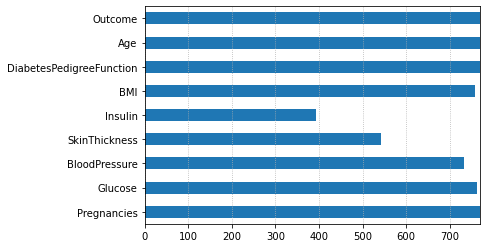

In [8]:
diabetes.count().plot(kind='barh')
plt.xlim(0,768)
plt.grid(linestyle=':',axis='x')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002482F5CF730>,
      dtype=object)

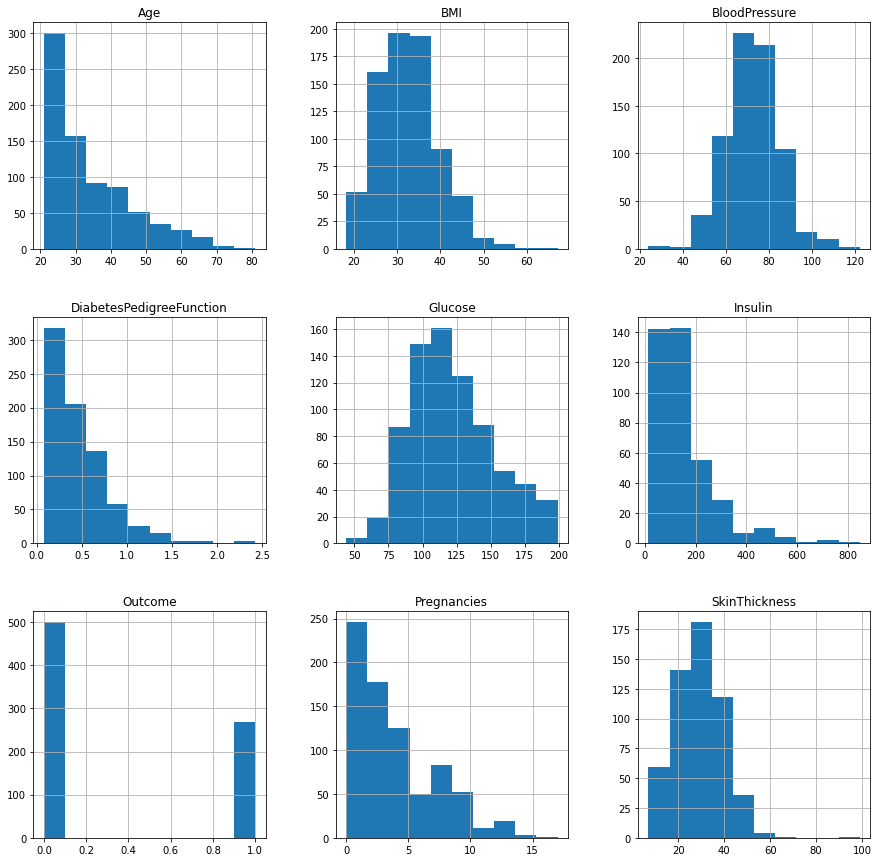

In [9]:
#diabetes features histogram
diabetes.hist(figsize=(15,15))

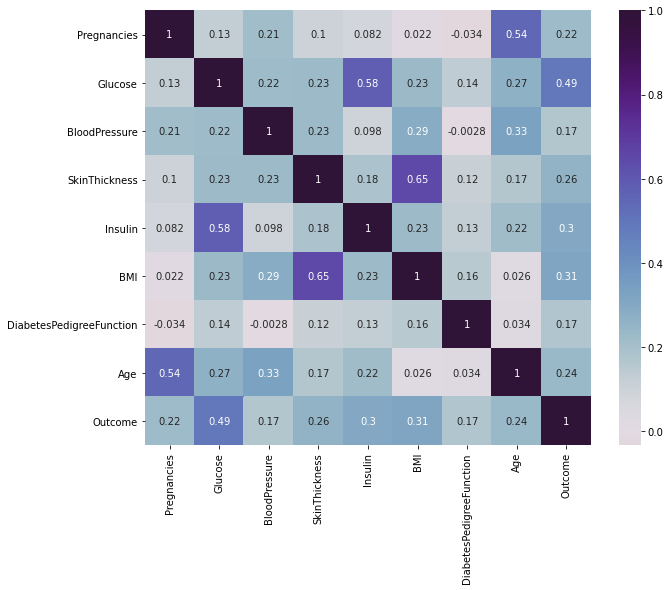

In [10]:
#Diabetes features correlation
#Pandas will only calculate correlation in a row which both features are not null
plt.figure(figsize=(10,8))
sns.heatmap(diabetes.corr(),center=0,annot=True,cmap='twilight_shifted_r')

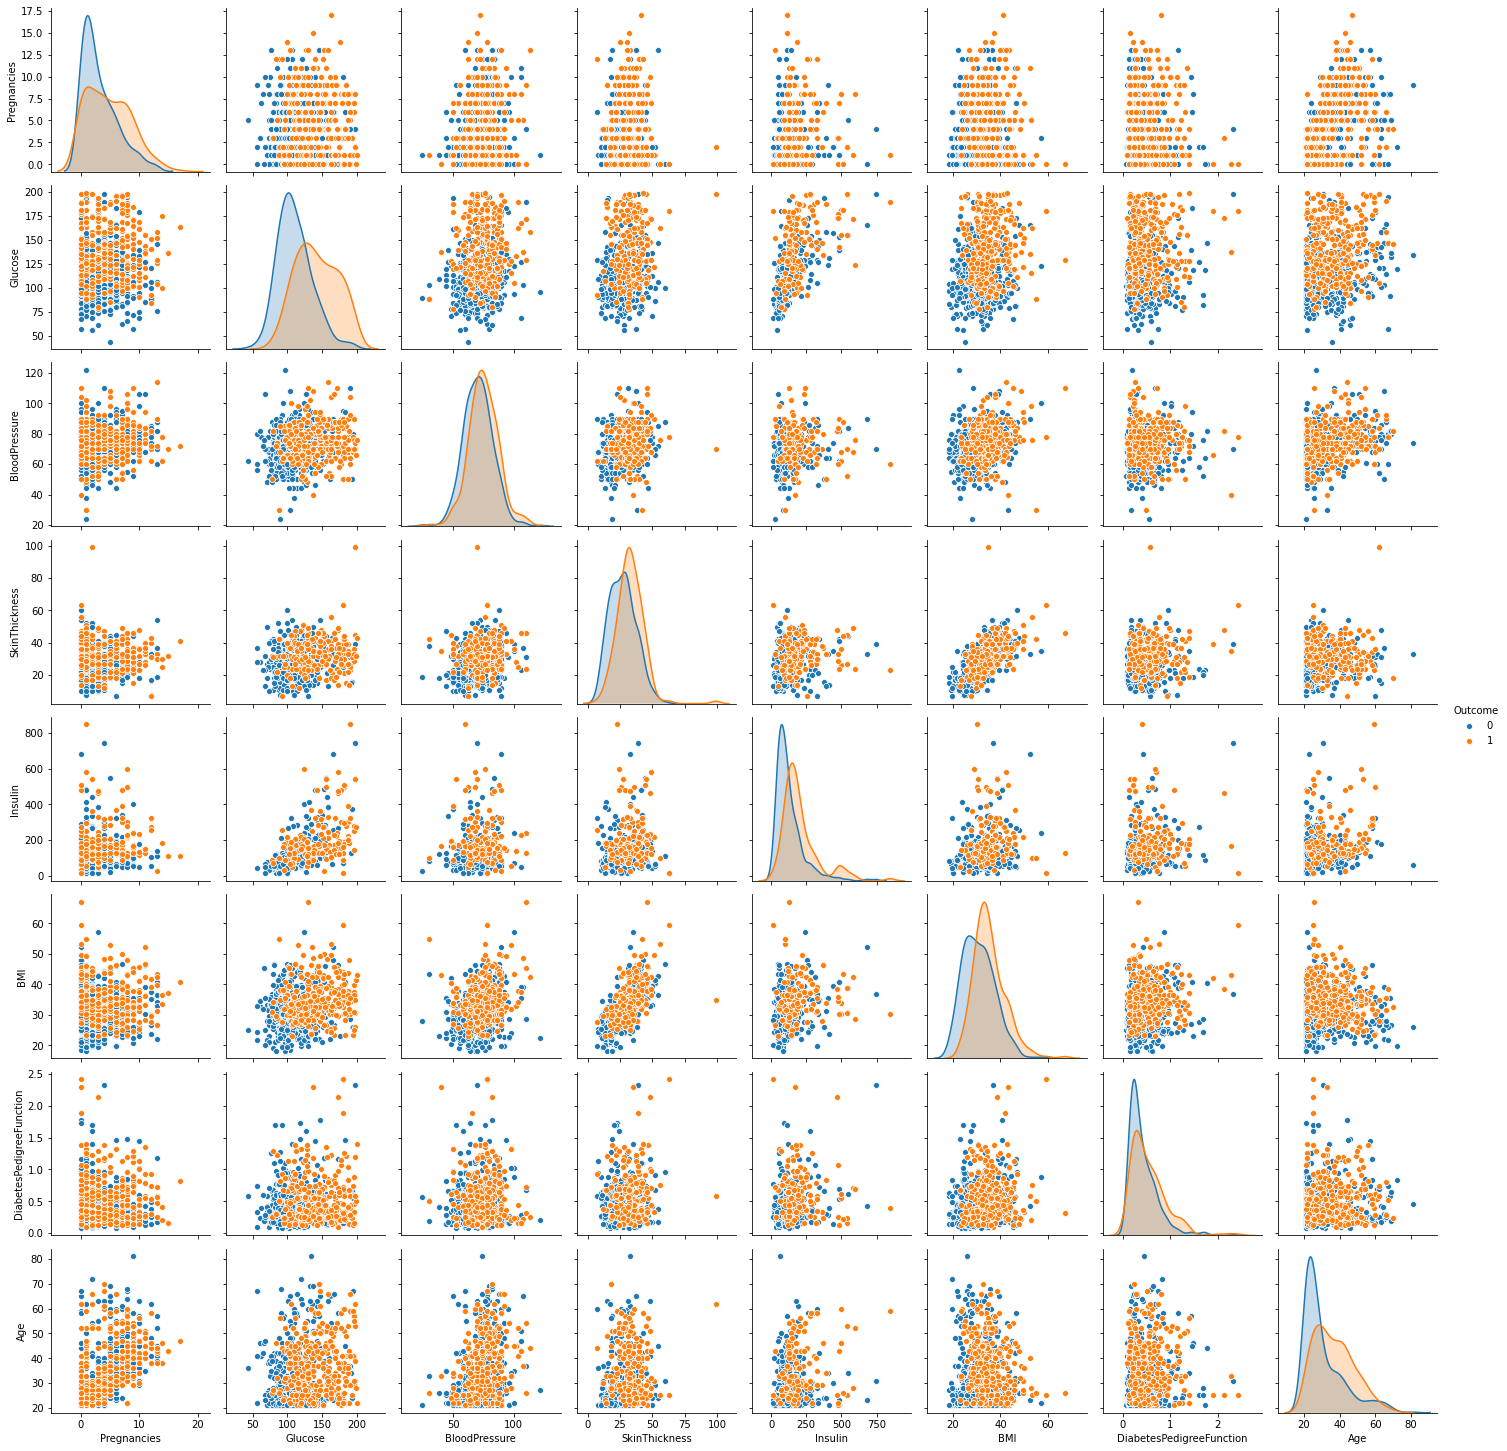

In [11]:
#Diabetes features pairplot
sns.pairplot(diabetes, hue="Outcome")

Text(0.5, 1.0, 'BMI and Glucose vs Outcome')

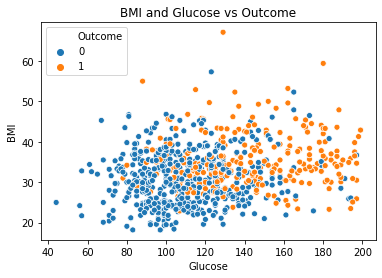

In [12]:
#Glucose & BMI scatterplot showing how outcome value distributed differently 
sns.scatterplot(diabetes.Glucose,diabetes.BMI,hue=diabetes.Outcome)
plt.title('BMI and Glucose vs Outcome')

In [13]:
print("Avg. Glucose(Diabetic)    :",round(diabetes.loc[diabetes.Outcome == 1,"Glucose"].mean(),2),
      "\nAvg. Glucose(Non-Diabetic):",round(diabetes.loc[diabetes.Outcome == 0,"Glucose"].mean(),2),
     "\nAvg. BMI(Diabetic)        :",round(diabetes.loc[diabetes.Outcome == 1,"BMI"].mean(),2),
      "\nAvg. BMI(Non-Diabetic)    :",round(diabetes.loc[diabetes.Outcome == 0,"BMI"].mean(),2))

Avg. Glucose(Diabetic)    : 142.32 
Avg. Glucose(Non-Diabetic): 110.64 
Avg. BMI(Diabetic)        : 35.41 
Avg. BMI(Non-Diabetic)    : 30.86


Text(0, 0.5, 'Positive Rate')

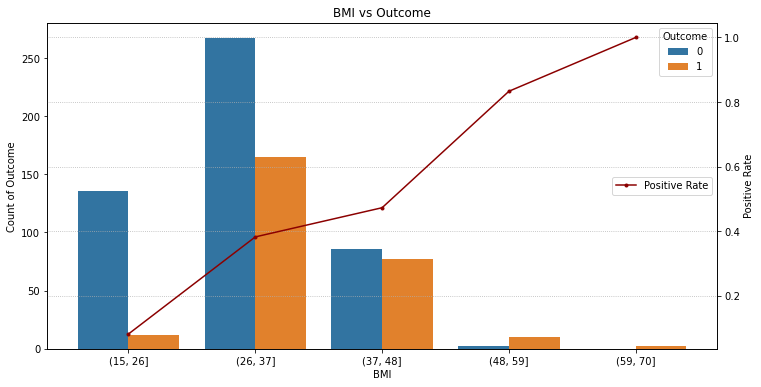

In [14]:
#Count of outcome with binned BMI as the X axis and a line showing rate of positive outcome(1)
bmi_bins = pd.cut(diabetes.BMI,bins=pd.interval_range(15,70,5))
fig, ax1 = plt.subplots(figsize=(12,6))
ax1 = sns.countplot(bmi_bins,hue=diabetes.Outcome)
ax1.legend(title='Outcome',loc='upper right')
ax1.set_title('BMI vs Outcome')
ax1.set_ylabel('Count of Outcome')
ax2 = ax1.twinx()
ax2 = (pd.crosstab(bmi_bins,diabetes.Outcome)[1]/bmi_bins.value_counts()).plot(color="DarkRed",label="Positive Rate", marker='.')
ax2.legend(loc='center right')
ax2.grid(linestyle=':',axis='y')
ax2.set_ylabel('Positive Rate')

Text(0, 0.5, 'Positive Rate')

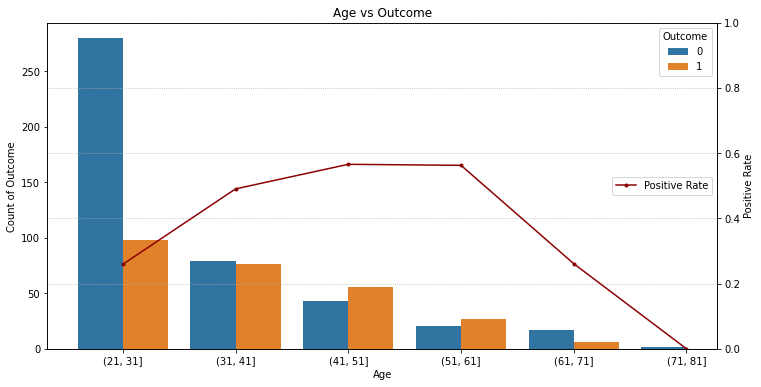

In [15]:
#Count of outcome with binned Age as the X axis and a line showing rate of positive outcome(1)
age_bins = pd.cut(diabetes.Age,bins=pd.interval_range(21,81,6))
fig, ax1 = plt.subplots(figsize=(12,6))
ax2 = sns.countplot(age_bins,hue=diabetes.Outcome)
ax2.legend(title='Outcome',loc='upper right')
ax1.set_title('Age vs Outcome')
ax1.set_ylabel('Count of Outcome')
ax2 = ax1.twinx()
ax1 = (pd.crosstab(age_bins,diabetes.Outcome)[1]/age_bins.value_counts()).plot(color="DarkRed",label="Positive Rate", marker='.')
ax1.set_ylim(0,1)
ax1.legend(loc='center right')
ax2.grid(linestyle=':',axis='y')
ax2.set_ylabel('Positive Rate')

Text(0, 0.5, 'Positive Rate')

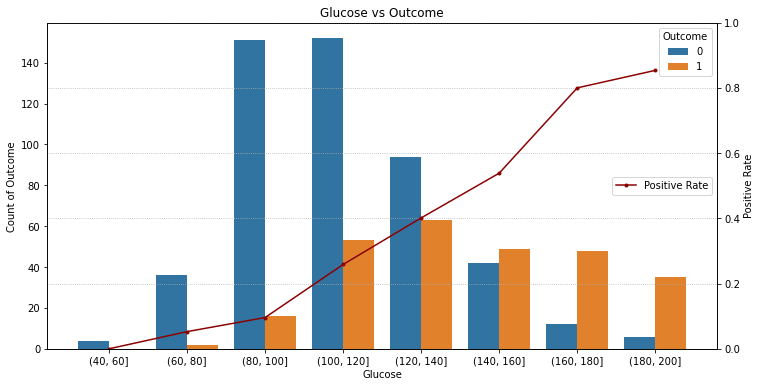

In [16]:
#Count of outcome with binned Glucose as the X axis and a line showing rate of positive outcome(1)
glu_bins = pd.cut(diabetes.Glucose,bins=pd.interval_range(40,200,8))
fig, ax1 = plt.subplots(figsize=(12,6))
ax1 = sns.countplot(glu_bins,hue=diabetes.Outcome)
ax1.legend(title='Outcome',loc='upper right')
ax1.set_title('Glucose vs Outcome')
ax1.set_ylabel('Count of Outcome')
ax2 = ax1.twinx()
ax2 = (pd.crosstab(glu_bins,diabetes.Outcome)[1]/glu_bins.value_counts()).plot(color="DarkRed",label="Positive Rate", marker='.')
ax2.set_ylim(0,1)
ax2.legend(loc='center right')
ax2.grid(linestyle=':',axis='y')
ax2.set_ylabel('Positive Rate')

In [17]:
#Splitting model into train and test set
from sklearn.model_selection import train_test_split
X = diabetes.drop("Outcome",axis=1)
y = diabetes.Outcome
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0,stratify=y)

In [18]:
print(f"X_train: {X_train.shape}\nX_test: {X_test.shape}\ny_train: {y_train.shape}\ny_test: {y_test.shape}")

X_train: (537, 8)
X_test: (231, 8)
y_train: (537,)
y_test: (231,)


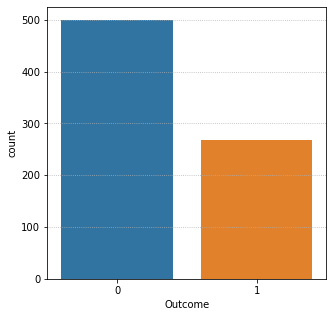

In [19]:
#Distribution of target feature (outcome)
plt.figure(figsize=(5,5))
sns.countplot(diabetes.Outcome)
plt.grid(linestyle=':',axis='y')

In [20]:
#There is a slight imbalance between two classes, but it doesn't require resampling or other treatment as the ratio is still tolerable.
print(f"Outcome(0:1): {diabetes.Outcome.value_counts()[0]} : {diabetes.Outcome.value_counts()[1]}"
    f"\nClass Ratio :{round(diabetes.Outcome.value_counts()[0]/diabetes.Outcome.value_counts()[1],2)} : {diabetes.Outcome.value_counts()[1]/diabetes.Outcome.value_counts()[1]}")

Outcome(0:1): 500 : 268
Class Ratio :1.87 : 1.0


In [21]:
#Using pipeline to avoid data leakage. I'm pipelining algorithms one-by-one so we can compare the best metrics for every tuned algorithms
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer 
from sklearn.pipeline import Pipeline

In [22]:
#StandardScaler for normally distributed data, MinMaxScaler for non-normally distributed data(see histogram above).
mmscl = MinMaxScaler()
stscl = StandardScaler()
ct = make_column_transformer((mmscl,["Pregnancies","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]),
                             (stscl,["Glucose","BloodPressure"]),remainder='passthrough')

In [23]:
#Import Imputer, LogisticRegression, GridSearchCV and metrics
from sklearn.experimental import enable_iterative_imputer #IterativeImputer needs to be enabled
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [24]:
#Create lists to collect the outputs of every classifiers
model_eval = []

In [25]:
#Disable warning during gridsearch and define IterativeImputer
import warnings
from sklearn.impute import IterativeImputer
warnings.filterwarnings('ignore') 
it = IterativeImputer()

In [26]:
#Trying model without hyperparameter tuning
nohype = []
models = [["LogisticRegression",LogisticRegression(random_state=1)],
          ["KNeighborsClassifier",KNeighborsClassifier()],
          ["SVC",SVC(random_state=1)],
         ["BaggingClassifier",BaggingClassifier(random_state=1)],
         ["RandomForestClassifier",RandomForestClassifier(random_state=1)],
         ["XGBClassifier",XGBClassifier(random_state=1)]]
for name,model in models:
    pipeline = Pipeline([('transform',ct),
                     ('impute',it),
                     ('classifier', model)])
    pipeline.fit(X_train,y_train)
    nohype.append([name,round(cross_val_score(pipeline,X_train,y_train,cv=10).mean(),4),round(pipeline.score(X_test,y_test),4)])
score_no_hyper = pd.DataFrame(nohype,columns=['classifier','no_hyper_train_score','no_hyper_test_score'])
score_no_hyper

[13:42:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:43:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:43:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:43:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

,classifier,no_hyper_train_score,no_hyper_test_score
0,LogisticRegression,0.7653,0.7662
1,KNeighborsClassifier,0.7335,0.7532
2,SVC,0.7542,0.7403
3,BaggingClassifier,0.7375,0.7316
4,RandomForestClassifier,0.7413,0.7403
5,XGBClassifier,0.7169,0.7489


In [27]:
#Logistic regression model fitting with hyperparameter tuning
logreg = LogisticRegression()
pipeline = Pipeline([('transform',ct),
                     ('impute',it),
                     ('classifier', logreg)])

grid_param = [ 
    {"classifier":[logreg],
     "classifier__random_state":[1],
    "classifier__C":[100, 10, 1.0, 0.1, 0.01], #A log scale to try
    "classifier__solver":['newton-cg', 'lbfgs', 'liblinear','sag','saga']}] #Solver

grid = GridSearchCV(pipeline,grid_param,cv=10,scoring='accuracy')

grid.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('transform',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('minmaxscaler',
                                                                         MinMaxScaler(),
                                                                         ['Pregnancies',
                                                                          'SkinThickness',
                                                                          'Insulin',
                                                                          'BMI',
                                                                          'DiabetesPedigreeFunction',
                                                                          'Age']),
                                                                        ('standardscaler',
                                            

In [28]:
#Best hyperparameter accuracy of LogisticRegression
print(grid.best_estimator_[2],
"\ntrain accuracy:",grid.best_score_,
"\ntest accuracy:",grid.score(X_test,y_test))
model_eval.append([(str(grid.best_estimator_[2]).split('(')[0]),
                  ("("+str(grid.best_estimator_[2]).split('(')[1]),
                  (grid.best_score_),
                  (grid.score(X_test,y_test))])

LogisticRegression(C=100, random_state=1, solver='newton-cg') 
train accuracy: 0.7690775681341719 
test accuracy: 0.7575757575757576


In [29]:
#KNearest Neighbors model fitting with hyperparameter tuning
knn = KNeighborsClassifier()
pipeline = Pipeline([('transform',ct),
                     ('impute',it),
                     ('classifier', knn)])

grid_param = [ 
    {"classifier": [knn],
     "classifier__n_neighbors": list(range(1,30))}]

grid = GridSearchCV(pipeline,grid_param,cv=10,scoring='accuracy')

grid.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('transform',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('minmaxscaler',
                                                                         MinMaxScaler(),
                                                                         ['Pregnancies',
                                                                          'SkinThickness',
                                                                          'Insulin',
                                                                          'BMI',
                                                                          'DiabetesPedigreeFunction',
                                                                          'Age']),
                                                                        ('standardscaler',
                                            

In [30]:
#Best hyperparameter accuracy of KNeighborsClassifier
print(grid.best_estimator_[2],
"\ntrain accuracy:",grid.best_score_,
"\ntest accuracy:",grid.score(X_test,y_test))
model_eval.append([(str(grid.best_estimator_[2]).split('(')[0]),
                  ("("+str(grid.best_estimator_[2]).split('(')[1]),
                  (grid.best_score_),
                  (grid.score(X_test,y_test))])

KNeighborsClassifier(n_neighbors=25) 
train accuracy: 0.7636268343815513 
test accuracy: 0.7229437229437229


In [31]:
#Support Vector Machine model fitting with hyperparameter tuning
svc = SVC()
pipeline = Pipeline([('transform',ct),
                     ('impute',it),
                     ('classifier', svc)])

grid_param =[
    {"classifier":[svc],
     "classifier__random_state":[1],
    "classifier__C":[100, 10, 1.0, 0.1, 0.01],
    "classifier__kernel":['linear', 'poly', 'rbf', 'sigmoid']}]

grid = GridSearchCV(pipeline,grid_param,cv=10,scoring='accuracy')

grid.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('transform',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('minmaxscaler',
                                                                         MinMaxScaler(),
                                                                         ['Pregnancies',
                                                                          'SkinThickness',
                                                                          'Insulin',
                                                                          'BMI',
                                                                          'DiabetesPedigreeFunction',
                                                                          'Age']),
                                                                        ('standardscaler',
                                            

In [32]:
#Best hyperparameter accuracy of SVC
print(grid.best_estimator_[2],
"\ntrain accuracy:",grid.best_score_,
"\ntest accuracy:",grid.score(X_test,y_test))
model_eval.append([(str(grid.best_estimator_[2]).split('(')[0]),
                  ("("+str(grid.best_estimator_[2]).split('(')[1]),
                  (grid.best_score_),
                  (grid.score(X_test,y_test))])

SVC(C=100, kernel='linear', random_state=1) 
train accuracy: 0.7708944793850454 
test accuracy: 0.7619047619047619


In [33]:
#Bagged decision trees (Bagging) model fitting with hyperparameter tuning
bag = BaggingClassifier()
pipeline = Pipeline([('impute',it),
                     ('classifier', bag)])

grid_param = [ 
    {"classifier":[bag],
     "classifier__random_state":[1],
     "classifier__n_estimators":[10,100,1000]}]

grid = GridSearchCV(pipeline,grid_param,cv=10,scoring='accuracy')

grid.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('impute', IterativeImputer()),
                                       ('classifier',
                                        BaggingClassifier(random_state=1))]),
             param_grid=[{'classifier': [BaggingClassifier(random_state=1)],
                          'classifier__n_estimators': [10, 100, 1000],
                          'classifier__random_state': [1]}],
             scoring='accuracy')

In [34]:
#Best hyperparameter accuracy of BaggingClassifier
print(grid.best_estimator_[1],
"\ntrain accuracy:",grid.best_score_,
"\ntest accuracy:",grid.score(X_test,y_test))
model_eval.append([(str(grid.best_estimator_[1]).split('(')[0]),
                  ("("+str(grid.best_estimator_[1]).split('(')[1]),
                  (grid.best_score_),
                  (grid.score(X_test,y_test))])

BaggingClassifier(random_state=1) 
train accuracy: 0.7431167016072676 
test accuracy: 0.7272727272727273


In [35]:
#Random forest model fitting with hyperparameter tuning
rfc = RandomForestClassifier()
pipeline = Pipeline([('impute',it),
                     ('classifier', rfc)])

grid_param = [ 
    {"classifier":[rfc],
     "classifier__random_state":[1],
     "classifier__n_estimators":[10,100,1000],
    "classifier__max_features":['sqrt', 'log2']}]

grid = GridSearchCV(pipeline,grid_param,cv=10,scoring='accuracy')

grid.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('impute', IterativeImputer()),
                                       ('classifier',
                                        RandomForestClassifier(max_features='log2',
                                                               random_state=1))]),
             param_grid=[{'classifier': [RandomForestClassifier(max_features='log2',
                                                                random_state=1)],
                          'classifier__max_features': ['sqrt', 'log2'],
                          'classifier__n_estimators': [10, 100, 1000],
                          'classifier__random_state': [1]}],
             scoring='accuracy')

In [36]:
#Best hyperparameter accuracy of RandomForestClassifier
print(grid.best_estimator_[1],
"\ntrain accuracy:",grid.best_score_,
"\ntest accuracy:",grid.score(X_test,y_test))
model_eval.append([(str(grid.best_estimator_[1]).split('(')[0]),
                  ("("+str(grid.best_estimator_[1]).split('(')[1]),
                  (grid.best_score_),
                  (grid.score(X_test,y_test))])

RandomForestClassifier(max_features='log2', random_state=1) 
train accuracy: 0.757896575821104 
test accuracy: 0.7532467532467533


In [37]:
#XGBoost model fitting with hyperparameter tuning
xgb = XGBClassifier()
pipeline = Pipeline([('impute',it),
                     ('classifier', xgb)])

grid_param = [ 
    {"classifier":[xgb],
     "classifier__random_state":[1],
     "classifier__learning_rate" : [0.10,0.20,0.30],
     "classifier__max_depth" : [3, 5, 8, 15],
     "classifier__min_child_weight" : [1, 5],
     "classifier__gamma" : [0.0, 0.1, 0.3],
     "classifier__colsample_bytree" : [0.3, 0.5],
    "classifier__eta" : [.3, .1, .01],
    "classifier__verbosity":[0]}]

grid = GridSearchCV(pipeline,grid_param,cv=10,scoring='accuracy')
grid.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('impute', IterativeImputer()),
                                       ('classifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=0.3,
                                                      eta=0.3, gamma=0.1,
                                                      gpu_id=None,
                                                      importance_type='gain',
                                                      interaction_constraints=None,
                                                      learning_rate=0.1,
                                                      max_delta_step=None,
                                  

In [38]:
#Best hyperparameter accuracy of XGBoost
print(grid.best_estimator_[1],
"\ntrain accuracy:",grid.best_score_,
"\ntest accuracy:",grid.score(X_test,y_test))
model_eval.append([(str(grid.best_estimator_[1]).split('(')[0]),
                  ("("+str(grid.best_estimator_[1]).split('(')[1]),
                  (grid.best_score_),
                  (grid.score(X_test,y_test))])

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, eta=0.3, gamma=0.1,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=0) 
train accuracy: 0.7653738644304682 
test accuracy: 0.7619047619047619


In [39]:
#Best accuracy output from each classifier
score = pd.DataFrame(model_eval,columns=['classifier',"hyperparam","train_score","test_score"])
score

,classifier,hyperparam,train_score,test_score
0,LogisticRegression,"(C=100, random_state=1, solver='newton-cg')",0.769078,0.757576
1,KNeighborsClassifier,(n_neighbors=25),0.763627,0.722944
2,SVC,"(C=100, kernel='linear', random_state=1)",0.770894,0.761905
3,BaggingClassifier,(random_state=1),0.743117,0.727273
4,RandomForestClassifier,"(max_features='log2', random_state=1)",0.757897,0.753247
5,XGBClassifier,"(base_score=0.5, booster='gbtree', colsample_b...",0.765374,0.761905


In [40]:
full_score = score.merge(score_no_hyper,on='classifier')
full_score

,classifier,hyperparam,train_score,test_score,no_hyper_train_score,no_hyper_test_score
0,LogisticRegression,"(C=100, random_state=1, solver='newton-cg')",0.769078,0.757576,0.7653,0.7662
1,KNeighborsClassifier,(n_neighbors=25),0.763627,0.722944,0.7335,0.7532
2,SVC,"(C=100, kernel='linear', random_state=1)",0.770894,0.761905,0.7542,0.7403
3,BaggingClassifier,(random_state=1),0.743117,0.727273,0.7375,0.7316
4,RandomForestClassifier,"(max_features='log2', random_state=1)",0.757897,0.753247,0.7413,0.7403
5,XGBClassifier,"(base_score=0.5, booster='gbtree', colsample_b...",0.765374,0.761905,0.7169,0.7489


Text(0.5, 1.0, 'Best Classifier Ranked by Test Score (Hyperparameter tuning)')

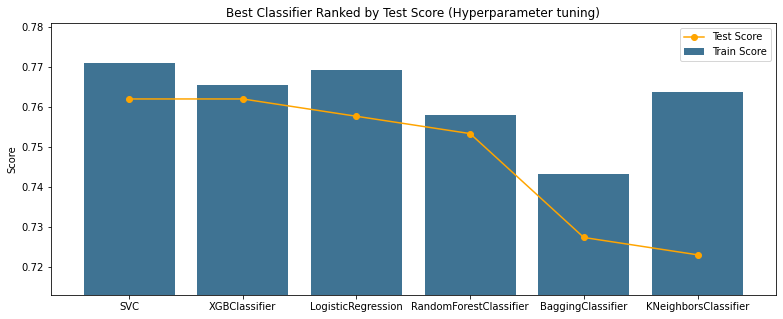

In [41]:
#Best classifier ranked by test score
fig, ax1 = plt.subplots(figsize=(13,5))
ax1 =sns.barplot(full_score.sort_values(by="test_score",ascending=False).classifier, full_score.sort_values(by="test_score",ascending=False).train_score,color='#3176a1',label='Train Score')
ax1.set_ylim(full_score.test_score.min()-0.01,score.train_score.max()+0.01)
plt.plot(full_score.sort_values(by="test_score",ascending=False).classifier, full_score.sort_values(by="test_score",ascending=False).test_score, marker='o', color='orange',label='Test Score',)
ax1.legend()
ax1.set_ylabel('Score')
ax1.set_xlabel(None)
ax1.set_title("Best Classifier Ranked by Test Score (Hyperparameter tuning)")

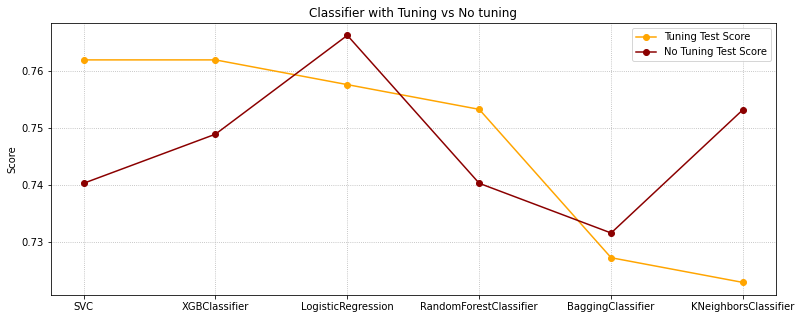

In [42]:
fig, ax1 = plt.subplots(figsize=(13,5))
plt.plot(full_score.sort_values(by="test_score",ascending=False).classifier, full_score.sort_values(by="test_score",ascending=False).test_score, marker='o', color='orange',label='Tuning Test Score',)
plt.plot(full_score.sort_values(by="test_score",ascending=False).classifier, full_score.sort_values(by="test_score",ascending=False).no_hyper_test_score, marker='o', color='darkred',label='No Tuning Test Score',)
ax1.legend()
ax1.set_title("Classifier with Tuning vs No tuning")
ax1.set_ylabel('Score')
ax1.grid(linestyle=':',axis='both')

In [43]:
#Fit the model with best performance
svc = SVC(C=100, kernel='linear', random_state=1) #Best hyperparameter based on gridsearch
pipeline = Pipeline([('transform',ct),
                     ('impute',it),
                     ('classifier', svc)])
pipeline.fit(X_train,y_train)
y_pred = pipeline.predict(X_test)

Text(0.5, 1.0, 'Confusion Matrix for SVM')

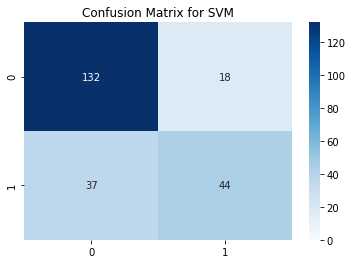

In [44]:
#Confusion matrix for the best performance
sns.heatmap(metrics.confusion_matrix(y_test,y_pred),vmin=0,annot=True,fmt='2.0f', cmap='Blues')
plt.title("Confusion Matrix for SVM")

In [45]:
#Metrics for the best performance
print(f"SVM Accuracy Score : {round(metrics.accuracy_score(y_test,y_pred),3)}",
      f"\nSVM Precision Score: {round(metrics.precision_score(y_test,y_pred),3)}",
     f"\nSVM Recall Score   : {round(metrics.recall_score(y_test,y_pred),3)}",
      f"\nSVM F1 Score       : {round(metrics.f1_score(y_test,y_pred),3)}")

SVM Accuracy Score : 0.762 
SVM Precision Score: 0.71 
SVM Recall Score   : 0.543 
SVM F1 Score       : 0.615


In [46]:
#Fit the model with best performance
logreg = LogisticRegression() 
pipeline = Pipeline([('transform',ct),
                     ('impute',it),
                     ('classifier', logreg)])
pipeline.fit(X_train,y_train)
y_pred = pipeline.predict(X_test)

Text(0.5, 1.0, 'Confusion Matrix for Logistics Regression')

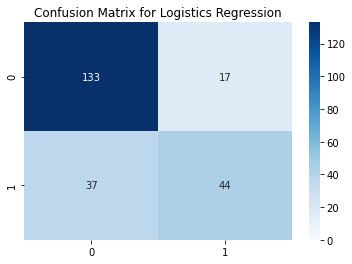

In [47]:
#Confusion matrix for the best performance
sns.heatmap(metrics.confusion_matrix(y_test,y_pred),vmin=0,annot=True,fmt='2.0f', cmap='Blues')
plt.title("Confusion Matrix for Logistics Regression")

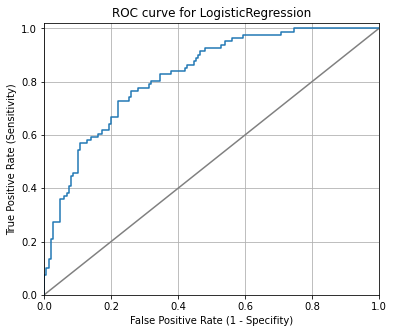

In [48]:
#ROC Curve of Logistic Regression
y_pred_prob = grid.predict_proba(X_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test,y_pred_prob)
plt.figure(figsize=(6,5))
plt.plot((0,1),(0,1),color='gray')
plt.plot(fpr, tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.02])
plt.title('ROC curve for LogisticRegression')
plt.xlabel('False Positive Rate (1 - Specifity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

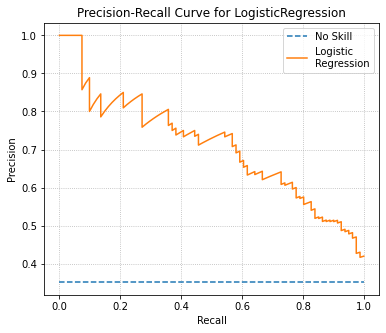

In [49]:
#Precision Recall Curve of Logistic Regression
y_pred_prob = grid.predict_proba(X_test)[:,1]
precision, recall, threshold = metrics.precision_recall_curve(y_test, y_pred_prob)
plt.figure(figsize=(6,5))
no_skill = len(y_test[y_test==1]) / len(y_test) 
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(recall, precision, label='Logistic\nRegression')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(linestyle=':')
plt.title('Precision-Recall Curve for LogisticRegression')
plt.legend()

In [50]:
#Metrics for the best performance
print(f"Logistic Regression Accuracy Score : {round(metrics.accuracy_score(y_test,y_pred),3)}",
      f"\nLogistic Regression Precision Score: {round(metrics.precision_score(y_test,y_pred),3)}",
     f"\nLogistic Regression Recall Score   : {round(metrics.recall_score(y_test,y_pred),3)}",
      f"\nLogistic Regression F1 Score       : {round(metrics.f1_score(y_test,y_pred),3)}")

Logistic Regression Accuracy Score : 0.766 
Logistic Regression Precision Score: 0.721 
Logistic Regression Recall Score   : 0.543 
Logistic Regression F1 Score       : 0.62


<h2 style="font-size:150%;">Resources</h2>
Dataset source:<br> 
<a href="https://www.kaggle.com/uciml/pima-indians-diabetes-database">Diabetes Dataset</a><br>
Reading:<br>
<p><a href="https://machinelearningmastery.com/data-preparation-without-data-leakage/">Data Leakage</a><br>
<a href="https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/">Data Transformation</a><br>
<a href="https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/">ROC vs PR Curves</a></p>
